In [137]:
#The goal for this project is to evaluate the impact of new regulations on pilots' safety and car paerfomance in Formula 1 from 1990 to 2023

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os
api = KaggleApi()
api.authenticate()
dataset = 'abdelghanibelgaid/f1-regulations-safety-and-racing-performance'
save_path = r'D:\Doud_Files\IT CAREER\Data\SPaceData\Datasets\F1_Safety'
os.makedirs(save_path, exist_ok = True)
api.dataset_download_files(dataset, path = save_path, unzip = True)

Dataset URL: https://www.kaggle.com/datasets/abdelghanibelgaid/f1-regulations-safety-and-racing-performance


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df= pd.read_csv(r'D:\Doud_Files\IT CAREER\Data\SPaceData\Datasets\F1_Safety\data.csv')

In [4]:
df.head()

,Season,Number of Teams,Number of Drivers,Number of Races,Number of New Regulations,New Regulations Impacting Aerodynamics,Fatalities,Average Car Weight (kg),DRS,Overtakes
0,1990,14,39,16,1,0,0,505,False,544
1,1991,12,26,16,1,0,0,505,False,518
2,1992,12,26,16,1,0,0,505,False,426
3,1993,12,26,16,1,0,0,505,False,434
4,1994,12,26,16,2,1,3,505,False,287


In [5]:
df.tail()

,Season,Number of Teams,Number of Drivers,Number of Races,Number of New Regulations,New Regulations Impacting Aerodynamics,Fatalities,Average Car Weight (kg),DRS,Overtakes
29,2019,10,20,21,2,1,0,743,True,949
30,2020,10,20,17,2,0,0,746,True,628
31,2021,10,20,22,5,2,0,752,True,807
32,2022,10,20,23,5,5,0,795,True,994
33,2023,10,20,23,4,4,0,798,True,1101


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Season                                  34 non-null     int64
 1   Number of Teams                         34 non-null     int64
 2   Number of Drivers                       34 non-null     int64
 3   Number of Races                         34 non-null     int64
 4   Number of New Regulations               34 non-null     int64
 5   New Regulations Impacting Aerodynamics  34 non-null     int64
 6   Fatalities                              34 non-null     int64
 7   Average Car Weight (kg)                 34 non-null     int64
 8   DRS                                     34 non-null     bool 
 9   Overtakes                               34 non-null     int64
dtypes: bool(1), int64(9)
memory usage: 2.6 KB


In [7]:
# Only 34 entries so I looked at the entire dataset directly

In [8]:
df

,Season,Number of Teams,Number of Drivers,Number of Races,Number of New Regulations,New Regulations Impacting Aerodynamics,Fatalities,Average Car Weight (kg),DRS,Overtakes
0,1990,14,39,16,1,0,0,505,False,544
1,1991,12,26,16,1,0,0,505,False,518
2,1992,12,26,16,1,0,0,505,False,426
3,1993,12,26,16,1,0,0,505,False,434
4,1994,12,26,16,2,1,3,505,False,287
5,1995,12,26,17,1,1,1,595,False,345
6,1996,11,22,16,1,0,0,595,False,212
7,1997,11,22,17,1,0,0,595,False,334
8,1998,11,22,16,1,0,0,595,False,217
9,1999,11,22,16,1,0,0,595,False,298


In [9]:
#Created a copy to avoid tempering with my read on the following steps
#The goal is to quickly visualize possible trends and links between the arrival of new regulations, new regulations on aerodynamics 
#and the number of fatalities.
#For easier visualization, the exact number of fatalities or regulation isn't taken into account, only their existence on each year.

In [10]:
df2 = pd.read_csv(r'D:\Doud_Files\IT CAREER\Data\SPaceData\Datasets\F1_Safety\data.csv')

In [11]:
df2['Number of New Regulations'] = df2['Number of New Regulations'] > 0
df2['New Regulations Impacting Aerodynamics'] = df2['New Regulations Impacting Aerodynamics'] > 0

(0.0, 4.0)

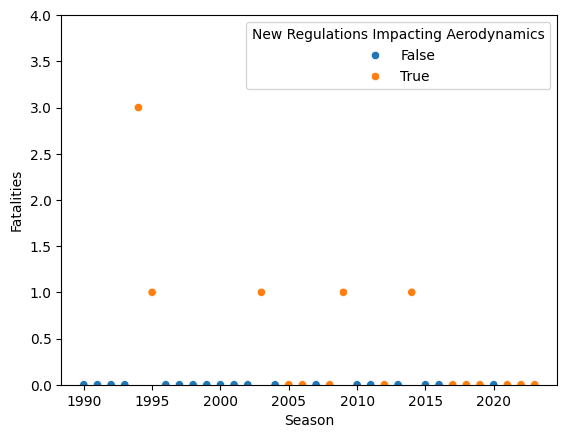

In [12]:
sns.scatterplot(data=df2, x='Season', y='Fatalities', hue='New Regulations Impacting Aerodynamics') 
plt.ylim(0,4)

In [13]:
#Numbering the result for future visualization

In [14]:
Year_with_fatalities = df2[df2['Fatalities'] > 0]

In [15]:
Year_with_regulations = df2[df2['Number of New Regulations'] >0]

In [16]:
Year_with_aerodynamics_regulations = df2[df2['New Regulations Impacting Aerodynamics'] > 0 ]

In [17]:
#Percentage of fatalities by new regulations from 1990 to 2024

In [18]:
Percent_of_fatalities_by_regulations = (Year_with_fatalities['Fatalities'].count() / Year_with_regulations['Number of New Regulations'].count()) * 100

In [19]:
print(Percent_of_fatalities_by_regulations)

14.705882352941178


In [138]:
#Percentage of fatalities by new regulations impacting aerodynamics from 1990 to 2023

In [139]:
Percent_of_fatalities_by_aerodynamics_regulations = (Year_with_fatalities['Fatalities'].count() / Year_with_aerodynamics_regulations['New Regulations Impacting Aerodynamics'].count()) * 100

In [140]:
print(Percent_of_fatalities_by_aerodynamics_regulations)

33.33333333333333


In [141]:
#Percentage of new regulations impacting aerodynamics in all new regulations from 1990 to 2023

In [24]:
Percent_of_aerodynamic_regulations_in_new_regulations = (Year_with_aerodynamics_regulations['New Regulations Impacting Aerodynamics'].count() /Year_with_regulations['Number of New Regulations'].count()) * 100

In [25]:
print(Percent_of_aerodynamic_regulations_in_new_regulations)

44.11764705882353


In [26]:
#As this is obvious in the scatterplot above, I will not calculate the percentage of death on the years od new regulation impacting arodynamics. 
#This percentage is 100%.

In [142]:
#Showing the global trend of fatalities along the years. We can see it's clearly going down and has been plateauing at 0 for the past 7 years

<Axes: xlabel='Season', ylabel='Fatalities'>

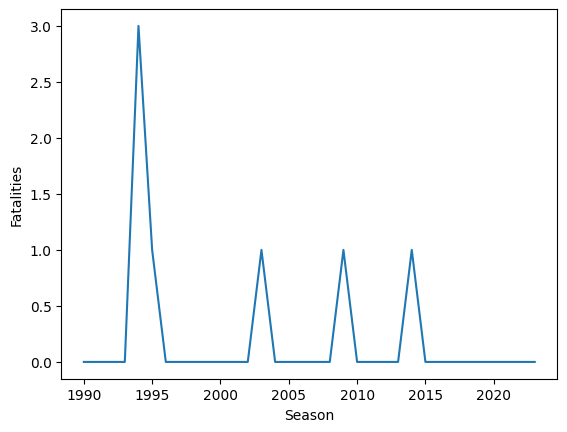

In [28]:
sns.lineplot(data = df2, x= 'Season', y='Fatalities')

In [50]:
#Original dataset re-called for ease of reading and to recover non-booleans on regulations and fatalities
#We will question wether aerodynamics regulation had in impact on car efficiency, expecially overtakes

In [48]:
df

,Season,Number of Teams,Number of Drivers,Number of Races,Number of New Regulations,New Regulations Impacting Aerodynamics,Fatalities,Average Car Weight (kg),DRS,Overtakes
0,1990,14,39,16,1,0,0,505,False,544
1,1991,12,26,16,1,0,0,505,False,518
2,1992,12,26,16,1,0,0,505,False,426
3,1993,12,26,16,1,0,0,505,False,434
4,1994,12,26,16,2,1,3,505,False,287
5,1995,12,26,17,1,1,1,595,False,345
6,1996,11,22,16,1,0,0,595,False,212
7,1997,11,22,17,1,0,0,595,False,334
8,1998,11,22,16,1,0,0,595,False,217
9,1999,11,22,16,1,0,0,595,False,298


In [52]:
#Creating two datasets: one with all the data from the years DRS didn't exist and one with all the data from the years with DRS
#Done because DRS will temper with the results as it is likely to be a big source of improvement on car efficiency and overtake

In [31]:
Years_with_no_DRS = df[df['DRS'] == False]

In [32]:
Years_with_DRS = df[df['DRS'] == True]

In [63]:
#We can see on the barplot below that aerodynamics regulation change didn't seem to have an big impact on car overtakes.

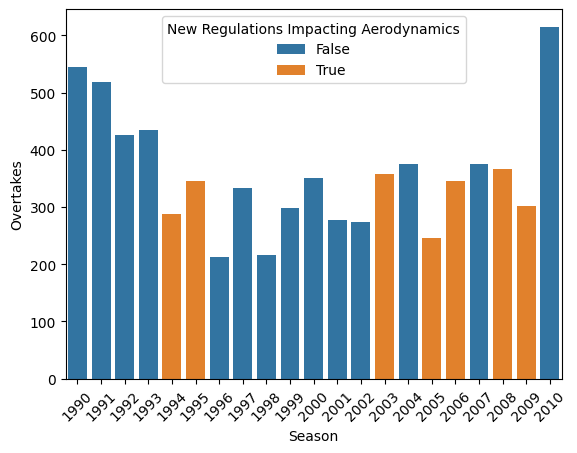

In [60]:
sns.barplot(data = Years_with_no_DRS, x = 'Season', y = 'Overtakes', hue = Years_with_no_DRS['New Regulations Impacting Aerodynamics'] > 0)
_ = plt.xticks(rotation = 45)

In [64]:
#We can see that aerodynamics regulations seem to have a higher impact after DRS but it is still not clear wether this is linked to the regulations

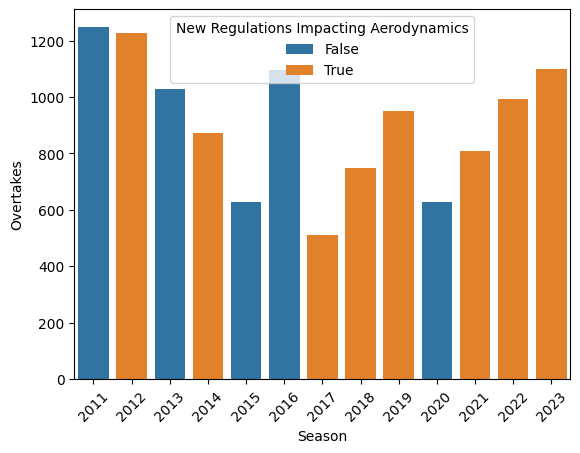

In [62]:
sns.barplot(data = Years_with_DRS, x = 'Season', y = 'Overtakes', hue = Years_with_DRS['New Regulations Impacting Aerodynamics'] > 0)
_ = plt.xticks(rotation = 45)

In [73]:
#We can clearly see, on the barplot below, the impact of the arrival of DRS on car overtakes
#I will number it more clearly

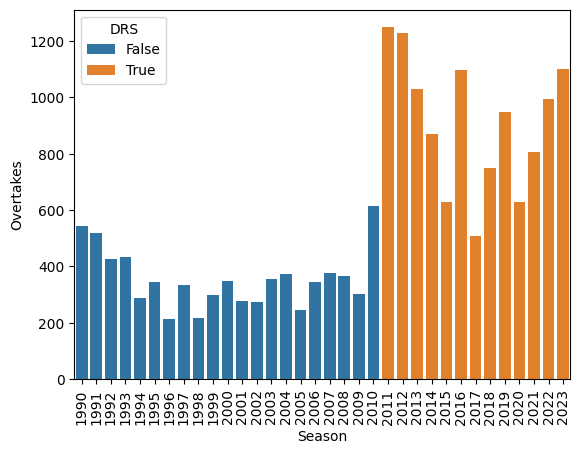

In [66]:
sns.barplot(data=df, x='Season', y='Overtakes', hue='DRS')
_ = plt.xticks(rotation = 90)

In [71]:
#Numbering the result to have easier-to-understand metrics
#All overtakes are summed up before and after DRS and compared to the number of races summed up before and after DRS

In [35]:
Nb_races_before_DRS = Years_with_no_DRS['Number of Races'].sum()

In [36]:
Nb_races_after_DRS = Years_with_DRS['Number of Races'].sum()

In [37]:
Nb_overtake_before_DRS = Years_with_no_DRS['Overtakes'].sum()

In [38]:
Nb_overtake_after_DRS = Years_with_DRS['Overtakes'].sum()

In [40]:
Number_of_overtakes_by_race_before_DRS = Nb_overtake_before_DRS / Nb_races_before_DRS

In [41]:
Number_of_overtakes_by_race_after_DRS = Nb_overtake_after_DRS / Nb_races_after_DRS

In [74]:
#Before DRS, there was a average of 21 overtakes by race

In [42]:
print(Number_of_overtakes_by_race_before_DRS)

21.237960339943342


In [75]:
#After DRS, there was an average of 49 overtakes by race

In [43]:
print(Number_of_overtakes_by_race_after_DRS)

44.85227272727273


In [44]:
Percent_of_overtake_gain_after_DRS = ((Number_of_overtakes_by_race_after_DRS - Number_of_overtakes_by_race_before_DRS) / Number_of_overtakes_by_race_before_DRS ) * 100

In [76]:
#DRS contributed to a 111% improvement in the number of overtakes over the years

In [45]:
print(Percent_of_overtake_gain_after_DRS)

111.18917263875248


In [82]:
#Now I will consider the car weight evolution
#Calling the dataset for ease

In [46]:
df

,Season,Number of Teams,Number of Drivers,Number of Races,Number of New Regulations,New Regulations Impacting Aerodynamics,Fatalities,Average Car Weight (kg),DRS,Overtakes
0,1990,14,39,16,1,0,0,505,False,544
1,1991,12,26,16,1,0,0,505,False,518
2,1992,12,26,16,1,0,0,505,False,426
3,1993,12,26,16,1,0,0,505,False,434
4,1994,12,26,16,2,1,3,505,False,287
5,1995,12,26,17,1,1,1,595,False,345
6,1996,11,22,16,1,0,0,595,False,212
7,1997,11,22,17,1,0,0,595,False,334
8,1998,11,22,16,1,0,0,595,False,217
9,1999,11,22,16,1,0,0,595,False,298


In [135]:
#Comparing evolution of car weight and overtakes along the years and noting the years with aerodynamics regulation change
#We see below that car weight is steadily increasing along the years 
#Car overtakes was slowly diminishing with car weight until 1995, then plateauing until the arrival of DRS in 2011 where it soared. 
#Car overtakes drops after first two regulation changes on aerodynamics, hits its low in 2016 then is raising on average with the new regulatons.

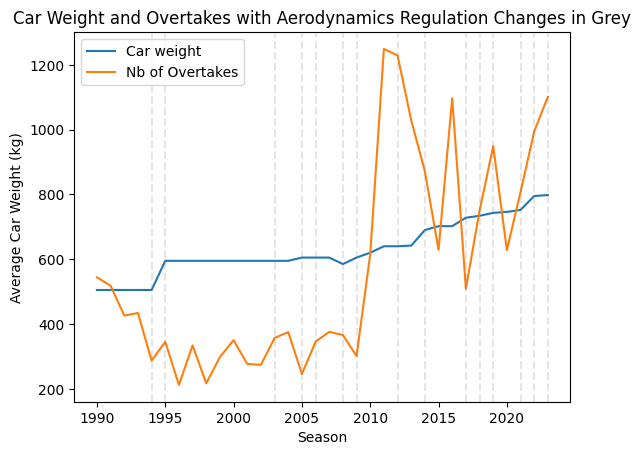

In [136]:
sns.lineplot(data=df, x='Season', y='Average Car Weight (kg)', label='Car weight')
sns.lineplot(data=df, x='Season', y='Overtakes', label='Nb of Overtakes')
aerodynamic_season = df[df['New Regulations Impacting Aerodynamics'] != 0]['Season']
for season in aerodynamic_season:
    plt.axvline(x=season, color='grey', linestyle='--', alpha=0.2)
_ = plt.title('Car Weight and Overtakes with Aerodynamics Regulation Changes in Grey')

In [144]:
#Conclusion: 
# -> New regulations on aerodynamics are the most dangerous, mostly likely to change of behaviour on the car and unexpected side-effects
#As such, 100% of fatalities happened on a year with new aerodynamics regulations, even though these changes only account for 44% of new regulations
# -> However, new regulations in general seem to have greatly improved the risk of fatal accidents and with fatalities diminishing steadily
# over the years and plateauing at 0 for the past 7 years
# -> New regulations on aerodynamics don't seem to have improved car performance before the arrival of DRS, and the continuous increase in car weight 
# was slowly impacting performance negatively as well
# -> The arrival of DRS transformed the cars' ability to overtake, which averages at 110% more than before DRS. It helped counter the increase in weight.
# -> Recent efforts in aerodynamics regulation seem to have taken advantage of DRS and increasing car weight while keeping fatalities at bay, showcasing 
# rapidly increasing ability to overtake, close to the peak at DRS arrival and before safety regulations.

#Analysis is done and ready to be made pretty ! 